In [1]:
# Import Dependencies
import numpy as np
from fashion_mnist import Fashion_MNIST
import tensorflow as tf
from tensorflow import estimator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Data
print('\nLoading Fashion MNIST Data...')
data = Fashion_MNIST('./dataset/fashion_mnist/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Fashion MNIST Data...

Loading Training Data...


In [3]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


In [4]:
# Make sure dataset is balanced
len(train_img), len(train_labels)

(60000, 60000)

In [5]:
len(test_img), len(test_labels)

(10000, 10000)

In [6]:
# Create a list of what each label means
label_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [7]:
# Plot a random image
n = np.random.randint(0,60000,1)
print(n)

[189]


(-0.5, 27.5, 27.5, -0.5)

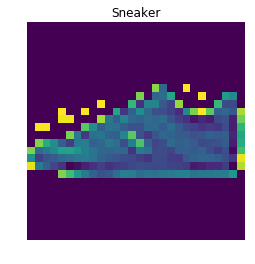

In [8]:
img = (np.reshape(train_img[n], (28, 28)) * 255).astype(np.uint8)
plt.imshow(img)
plt.title(label_names[train_labels[n[0]]])
plt.axis('off')

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_img, train_labels, test_size=0.2, random_state=101)

In [11]:
len(X_train), len(y_train)

(48000, 48000)

In [12]:
len(X_test), len(y_test)

(12000, 12000)

In [13]:
# Make Feature Columns
feat_cols = [tf.feature_column.numeric_column('X', shape=[28, 28])]

In [14]:
print(feat_cols)

[_NumericColumn(key='X', shape=(28, 28), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [15]:
dnn_model = estimator.DNNClassifier(hidden_units=[512,256,64,32], feature_columns=feat_cols, n_classes=10, optimizer=tf.train.AdamOptimizer(learning_rate=1e-4), dropout=0.1, model_dir='./tmp/fashion_mnist_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_summary_steps': 100, '_is_chief': True, '_task_id': 0, '_master': '', '_save_checkpoints_secs': 600, '_service': None, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C307998E80>, '_model_dir': './tmp/fashion_mnist_model', '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': 'worker'}


In [16]:
input_fn = estimator.inputs.numpy_input_fn(x={'X':X_train}, y=y_train.astype(np.int32), shuffle=True, batch_size=128, num_epochs=5)

In [17]:
dnn_model.train(input_fn=input_fn, steps=200000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./tmp/fashion_mnist_model\model.ckpt-6675
INFO:tensorflow:Saving checkpoints for 6676 into ./tmp/fashion_mnist_model\model.ckpt.
INFO:tensorflow:step = 6676, loss = 50.7958
INFO:tensorflow:global_step/sec: 184.633
INFO:tensorflow:step = 6776, loss = 37.0641 (0.541 sec)
INFO:tensorflow:global_step/sec: 224.035
INFO:tensorflow:step = 6876, loss = 56.3296 (0.446 sec)
INFO:tensorflow:global_step/sec: 218.129
INFO:tensorflow:step = 6976, loss = 52.3101 (0.460 sec)
INFO:tensorflow:global_step/sec: 215.496
INFO:tensorflow:step = 7076, loss = 49.1885 (0.465 sec)
INFO:tensorflow:global_step/sec: 217.605
INFO:tensorflow:step = 7176, loss = 53.1684 (0.459 sec)
INFO:tensorflow:global_step/sec: 230.904
INFO:tensorflow:step = 7276, loss = 45.1657 (0.433 sec)
INFO:tensorflow:global_step/sec: 237.119
INFO:tensorflow:step = 7376, loss = 66.1803 (0.421 sec)
INFO:tensorflow:global_step/sec: 218.676
INFO:tensorflow:step 

In [18]:
eval_fn = estimator.inputs.numpy_input_fn(x={'X':X_test}, y=y_test.astype(np.int32), num_epochs=1, shuffle=False)

In [19]:
validation_accuracy_score = dnn_model.evaluate(input_fn=eval_fn, steps=20)
print('Validation Report: ',validation_accuracy_score)

INFO:tensorflow:Starting evaluation at 2018-02-26-20:07:07
INFO:tensorflow:Restoring parameters from ./tmp/fashion_mnist_model\model.ckpt-8550
INFO:tensorflow:Evaluation [1/20]
INFO:tensorflow:Evaluation [2/20]
INFO:tensorflow:Evaluation [3/20]
INFO:tensorflow:Evaluation [4/20]
INFO:tensorflow:Evaluation [5/20]
INFO:tensorflow:Evaluation [6/20]
INFO:tensorflow:Evaluation [7/20]
INFO:tensorflow:Evaluation [8/20]
INFO:tensorflow:Evaluation [9/20]
INFO:tensorflow:Evaluation [10/20]
INFO:tensorflow:Evaluation [11/20]
INFO:tensorflow:Evaluation [12/20]
INFO:tensorflow:Evaluation [13/20]
INFO:tensorflow:Evaluation [14/20]
INFO:tensorflow:Evaluation [15/20]
INFO:tensorflow:Evaluation [16/20]
INFO:tensorflow:Evaluation [17/20]
INFO:tensorflow:Evaluation [18/20]
INFO:tensorflow:Evaluation [19/20]
INFO:tensorflow:Evaluation [20/20]
INFO:tensorflow:Finished evaluation at 2018-02-26-20:07:08
INFO:tensorflow:Saving dict for global step 8550: accuracy = 0.861328, average_loss = 0.374063, global_step

In [20]:
# Predictions
final_pred_fn = estimator.inputs.numpy_input_fn(x={'X':test_img}, num_epochs=1, shuffle=False)
pred = list(dnn_model.predict(input_fn=final_pred_fn))

INFO:tensorflow:Restoring parameters from ./tmp/fashion_mnist_model\model.ckpt-8550


In [21]:
pred

[{'class_ids': array([9], dtype=int64),
  'classes': array([b'9'], dtype=object),
  'logits': array([  4.17660999, -12.12388229,   2.61239791,   0.58837372,
           3.31778073,   7.17479515,   1.62564898,   8.02491093,
           2.01399684,  15.79556561], dtype=float32),
  'probabilities': array([  8.98841154e-06,   7.48977378e-13,   1.88085096e-06,
           2.48503170e-07,   3.80800975e-06,   1.80209739e-04,
           7.01156353e-07,   4.21675941e-04,   1.03388470e-06,
           9.99381423e-01], dtype=float32)},
 {'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object),
  'logits': array([  2.99842262e+00,  -1.04204118e-02,   1.86821365e+01,
           8.63846898e-01,   1.01917019e+01,  -1.03428535e+01,
           1.22953281e+01,  -1.56683140e+01,  -5.81029475e-01,
          -9.84664059e+00], dtype=float32),
  'probabilities': array([  1.54109699e-07,   7.60512275e-09,   9.98114467e-01,
           1.82303861e-08,   2.05036617e-04,   2.47620907e-13,
     

In [22]:
predictions = [p['class_ids'][0] for p in pred]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(classification_report(test_labels, predictions))

             precision    recall  f1-score   support

          0       0.81      0.83      0.82      1000
          1       0.99      0.95      0.97      1000
          2       0.76      0.77      0.76      1000
          3       0.87      0.88      0.87      1000
          4       0.74      0.81      0.77      1000
          5       0.98      0.94      0.96      1000
          6       0.68      0.62      0.65      1000
          7       0.92      0.96      0.94      1000
          8       0.97      0.95      0.96      1000
          9       0.95      0.95      0.95      1000

avg / total       0.87      0.87      0.87     10000



In [25]:
print(confusion_matrix(test_labels, predictions))

[[830   0  13  31   5   3 112   0   6   0]
 [  1 953   8  27   3   0   7   0   1   0]
 [ 17   0 767   9 133   0  73   0   1   0]
 [ 28   4  12 877  53   0  24   0   2   0]
 [  0   1 102  26 808   0  61   0   2   0]
 [  0   0   0   0   0 942   0  38   1  19]
 [150   0 102  30  81   0 624   0  13   0]
 [  0   0   0   0   0   8   0 959   0  33]
 [  4   0   5   7   7   1  18   6 952   0]
 [  0   0   0   0   0   9   1  41   0 949]]


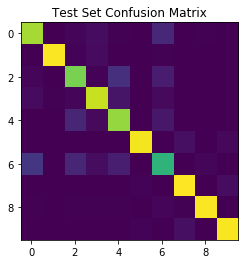

In [26]:
plt.imshow(confusion_matrix(test_labels, predictions))
plt.title('Test Set Confusion Matrix')